# Part 1b) Fit of  $m_{\rm BC}$ for a simulation sample

In [1]:
import ROOT as r

Welcome to JupyROOT 6.08/02


Now I want to run a realistic fit to some actual simulation. If you have some kicking around from previous tutorials, grab that. Otherwise grab it from my DESY stash repository.

`git clone ssh://git@stash.desy.de:7999/~scunliff/b2gm-roofit-tutorial-feb2017.git`

or maybe you can just wget it:

`wget https://stash.desy.de/users/scunliff/repos/b2gm-roofit-tutorial-feb2017/browse/fitme.root`

In [2]:
# get the data in a TTree format
fi = r.TFile('fitme.root', 'READ')
tr = r.TTree()
fi.GetObject('BtoKstG', tr)
# check we have the tree
print(tr.GetEntries())

7205


In [3]:
# get the data in RooFit land
mBC = r.RooRealVar('B0_mbc', 'm_{MC}', 5.2, 5.29, 'GeV/c^{2}')
rds = r.RooDataSet('data', 'B#rightarrow K^{*}#gamma simulation', tr, r.RooArgSet(mBC))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooAbsReal::attachToTree(B0_mbc) TTree Float_t branch B0_mbc will be converted to double precision


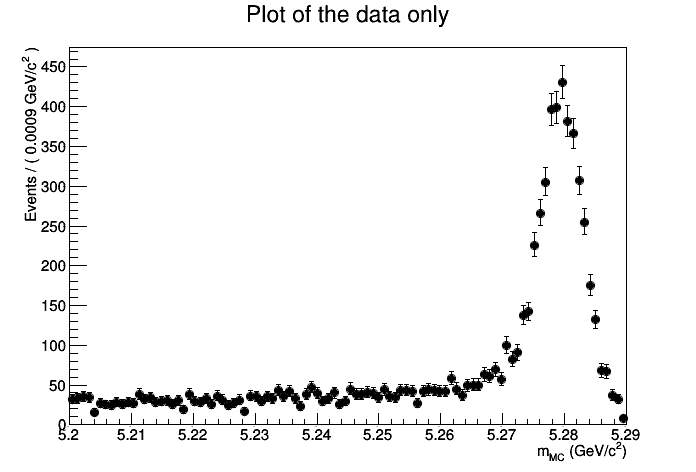

In [4]:
# always draw plot to make sure things look sane -- saves a lot of time debugging
canvas = r.TCanvas()
plot = mBC.frame()
plot.SetTitle('Plot of the data only')
rds.plotOn(plot)
plot.Draw()
canvas.Draw()

In [5]:
# signal model
mB0 = r.RooRealVar('mB0', 'm_{B^0}', 5.280, 5.1, 5.3, 'GeV/c^{2}')      # the mass of the B0 meson
gB0 = r.RooRealVar('gB0', '#Gamma_{B^0}', 0.003, 0.0, 0.015, 'GeV/c^{2}')   # the width of the B0 meson
alp = r.RooRealVar('alp', '#alpha_{CB}', 1.3, 0.1, 5)
ncb = r.RooRealVar('ncb', 'n_{CB}', 15)
sig = r.RooCBShape('sig', 'signal component', mBC, mB0, gB0, alp, ncb)

In [6]:
# background model
mCt = r.RooRealVar('mCt', 'm_{cutoff}', 5.29, 5.2, 5.3, 'GeV/c^{2}')
crv = r.RooRealVar('crv', 'c_{curvature}', -20, -80, -1)
bkg = r.RooArgusBG('bkg', 'background component', mBC, mCt, crv)

RooArgusBG::bkg[ m=B0_mbc m0=mCt c=crv p=0.5 ] = 0.486482


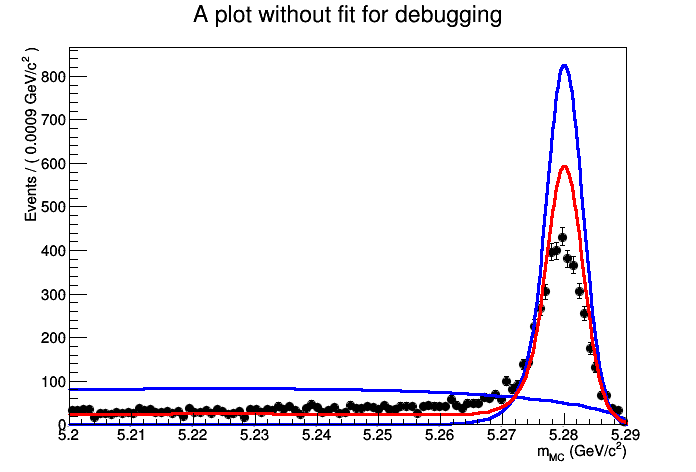

In [7]:
# combined model
#fsb = r.RooRealVar('fsb', 'n_{s}/(n_{s}+n_{b})', 0.7, 0.0, 1.0)
#pdf = r.RooAddPdf('pdf', 'two component model', sig, bkg, fsb)
nsg = r.RooRealVar('nsg', 'n_{s}', 7000, 0, 10000)
nbg = r.RooRealVar('nbg', 'n_{b}', 3000, 0, 10000)
pdf = r.RooAddPdf('pdf', 'two component model', r.RooArgList(sig, bkg), r.RooArgList(nsg, nbg))

bkg.Print()
debug = mBC.frame()
debug.SetTitle('A plot without fit for debugging')
rds.plotOn(debug)
bkg.plotOn(debug)
sig.plotOn(debug)
pdf.plotOn(debug, r.RooFit.LineColor(r.kRed))
debug.Draw()
canvas.Draw()

In [8]:
# run the fit - save output as a RooFitResult
rfr = pdf.fitTo(rds, r.RooFit.Save(True), r.RooFit.Strategy(2)) ###, r.RooFit.Extended(True))

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (sig,bkg)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alp          1.30000e+00  4.90000e-01    1.00000e-01  5.00000e+00
     2 crv         -2.00000e+01  7.90000e+00   -8.00000e+01 -1.00000e+00
     3 gB0          3.00000e-03  1.50000e-03    0.00000e+00  1.50000e-02
     4 mB0          5.28000e+00  1.00000e-02    5.10000e+00  5.30000e+00
     5 mCt          5.29000e+00  5.00000e-03    5.20000e+00  5.30000e+00
     6 nbg          3.00000e+03  1.00000e+03    0.00000e+00  1.00000e+04
     7 nsg          7.00000e+03  1.00000e+03    0.00000e+00  1.00000e+04
 **********
 

[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) directly selected PDF components: (sig)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) indirectly selected PDF components: ()


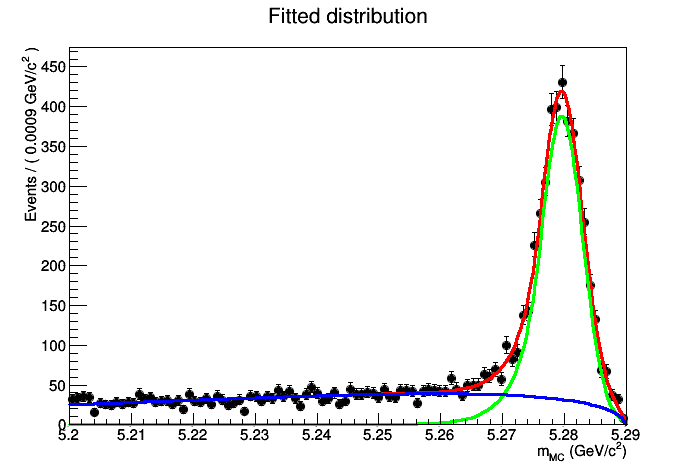

In [9]:
plot.SetTitle('Fitted distribution')
pdf.plotOn(plot, r.RooFit.LineColor(r.kRed))
pdf.plotOn(plot, r.RooFit.Components('sig'), r.RooFit.LineColor(r.kGreen))
pdf.plotOn(plot, r.RooFit.Components('bkg'), r.RooFit.LineColor(r.kBlue))
plot.Draw()
canvas.Draw()

In [10]:
rfr.Print()


  RooFitResult: minimized FCN value: -77829.9, estimated distance to minimum: 1.12029
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                   alp    1.1010e+00 +/-  8.08e-02
                   crv   -4.3541e+01 +/-  3.41e+00
                   gB0    3.3843e-03 +/-  7.88e-05
                   mB0    5.2796e+00 +/-  8.65e-05
                   mCt    5.2898e+00 +/-  5.01e-04
                   nbg    3.2716e+03 +/-  8.73e+01
                   nsg    3.9336e+03 +/-  9.10e+01



In [11]:
pars = rfr.floatParsFinal()

In [12]:
pars.Print()

RooArgList:: = (alp,crv,gB0,mB0,mCt,nbg,nsg)


In [13]:
print(pars[0].getVal(), '+/-', pars[0].getError())

1.1010388343478337 +/- 0.0808246669237247


In [14]:
cor = rfr.correlationHist()

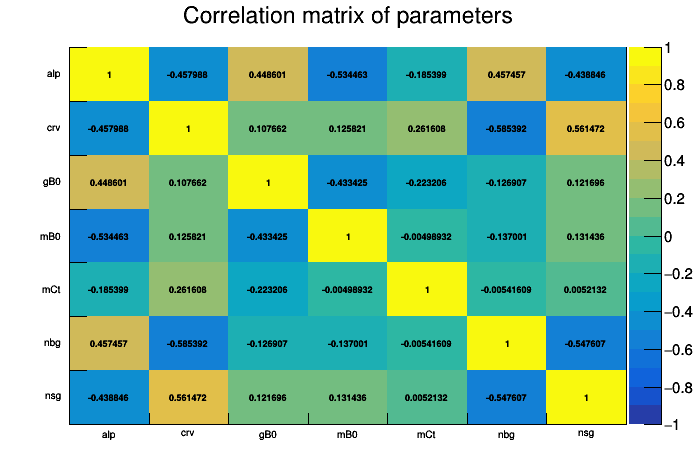

In [15]:
cor.SetStats(0)
cor.SetTitle('Correlation matrix of parameters')
cor.Draw('textcolz')
canvas.Draw()